# Census Tract Adjacency Methods Comparison

This notebook compares different methods for computing tract adjacency:
1. Queen Contiguity (libpysal)
2. Rook Contiguity (libpysal)
3. Custom Geometric (buffered)
4. K-Nearest Neighbors
5. Distance-based threshold

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
from tract_weights import TractWeightsGenerator
from IPython.display import display, HTML

%matplotlib inline


## Generate Weights

First, let's compute all types of weights matrices and analyze their properties.

In [13]:
# Initialize weights generator
generator = TractWeightsGenerator("/share/ju/matt/street-flooding/aggregation/geo/data/ct-nyc-2020.geojson")

blacklist = {
    844: [1196, 1190, 1172],
    1172: [989],
    1169: [989, 988],
    1168: [988, 839, 2032],
    1984: [1983, 2032],
    2045: [2156], 
    841: [1619], 
    2002: [2252], 
    973: [1907], 
    952: [2064], 
    2026: [2172],
    2065: [2282], 
    2161: [156],
    2279: [1041], 
    2225: [975], 
}

generator.set_blacklist(blacklist)

# Compute all weights
weights_results = generator.compute_all_weights()

# export 
generator.export_adjacency_lists("custom_geometric", output_dir="../../../data/processed/")


Validating blacklist entries:

Tract index 844 (ID: 1000500) will not connect to:
  - Index 1196 (ID: 3005303)
  - Index 1190 (ID: 3004700)
  - Index 1172 (ID: 3000700)

Tract index 1172 (ID: 3000700) will not connect to:
  - Index 989 (ID: 1000900)

Tract index 1169 (ID: 3000301) will not connect to:
  - Index 989 (ID: 1000900)
  - Index 988 (ID: 1000700)

Tract index 1168 (ID: 3000100) will not connect to:
  - Index 988 (ID: 1000700)
  - Index 839 (ID: 1001502)
  - Index 2032 (ID: 1001501)

Tract index 1984 (ID: 3002100) will not connect to:
  - Index 1983 (ID: 1000202)
  - Index 2032 (ID: 1001501)

Tract index 2045 (ID: 1002400) will not connect to:
  - Index 2156 (ID: 3055500)

Tract index 841 (ID: 1004400) will not connect to:
  - Index 1619 (ID: 3055700)

Tract index 2002 (ID: 1006200) will not connect to:
  - Index 2252 (ID: 3056500)

Tract index 973 (ID: 4000101) will not connect to:
  - Index 1907 (ID: 1008601)

Tract index 952 (ID: 4000102) will not connect to:
  - Index 206

/share/ju/matt/street-flooding/notebooks/for_paper/adjacency/tract_weights.py:162: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  queen = libpysal.weights.Queen.from_dataframe(self.ct_nyc)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 5 islands with ids: 0, 2055, 2056, 2165, 2277.
  W.__init__(self, neighbors, ids=ids, **kw)
/share/ju/matt/street-flooding/notebooks/for_paper/adjacency/tract_weights.py:173: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  rook = libpysal.weights.Rook.from_dataframe(self.ct_nyc)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/libpysal/weights/contiguity.py:61: Use


Blacklist validation:
Number of tracts with blacklist entries: 15
Blacklisted connections:
Tract 844 blocked from: [1196, 1190, 1172]
Tract 1172 blocked from: [989]
Tract 1169 blocked from: [989, 988]
Tract 1168 blocked from: [988, 839, 2032]
Tract 1984 blocked from: [1983, 2032]
Tract 2045 blocked from: [2156]
Tract 841 blocked from: [1619]
Tract 2002 blocked from: [2252]
Tract 973 blocked from: [1907]
Tract 952 blocked from: [2064]
Tract 2026 blocked from: [2172]
Tract 2065 blocked from: [2282]
Tract 2161 blocked from: [156]
Tract 2279 blocked from: [1041]
Tract 2225 blocked from: [975]
Blocking connection between tracts 156 and 2161
Blocking connection between tracts 839 and 1168
Blocking connection between tracts 841 and 1619
Blocking connection between tracts 844 and 1172
Blocking connection between tracts 844 and 1190
Blocking connection between tracts 844 and 1196
Blocking connection between tracts 952 and 2064
Blocking connection between tracts 973 and 1907
Blocking connection

/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/share/ju/conda_virtualenvs/urbanekg/lib/python3.11/site-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 217 disconnected components.
 There are 185 islands with ids: 0, 155, 185, 272, 340, 349, 535, 549, 641, 735, 741, 742, 743, 744, 746, 749, 750, 755, 759, 760, 762, 763, 767, 804, 809, 810, 811, 824, 825, 826, 827, 828, 829, 830, 831, 843, 844, 846, 853, 854, 871, 886, 921, 923, 926, 927, 928, 937, 945, 949, 973, 974, 1040, 1051, 1081, 1082, 1094, 1099, 1101, 1102, 1103, 1105, 1107, 1108, 1110, 1113, 1114, 1115, 1116, 1117, 1120, 1121, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1136, 1137, 1138, 1139, 1142, 1143, 1144, 1145, 1148, 1149, 1150, 1151, 115

('../../../data/processed/ct_nyc_adj_list_custom_geometric_node1.txt',
 '../../../data/processed/ct_nyc_adj_list_custom_geometric_node2.txt')

In [21]:
weights_results

{'queen': WeightsAnalysis(weights_matrix=array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]]), n_connections=7190, isolated_tracts=[0, 2055, 2056, 2165, 2277], avg_connections=6.184946236559139, description='Queen Contiguity from libpysal'),
 'rook': WeightsAnalysis(weights_matrix=array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]]), n_connections=6052, isolated_tracts=[0, 2055, 2056, 2165, 2277], avg_connections=5.206021505376344, description='Rook Contiguity from libpysal'),
 'custom_geometric': WeightsAnalysis(weights_matrix=array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
 

In [14]:
# Create comparison dataframe
comparison_data = {
    'Method': [],
    'Description': [],
    'Total Connections': [],
    'Avg Connections per Tract': [],
    'Isolated Tracts': []
}

for method, analysis in weights_results.items():
    comparison_data['Method'].append(method)
    comparison_data['Description'].append(analysis.description)
    comparison_data['Total Connections'].append(analysis.n_connections)
    comparison_data['Avg Connections per Tract'].append(analysis.avg_connections)
    comparison_data['Isolated Tracts'].append(len(analysis.isolated_tracts))
    
comparison_df = pd.DataFrame(comparison_data)
display(comparison_df.style.format({
    'Avg Connections per Tract': '{:.2f}'
}))

,Method,Description,Total Connections,Avg Connections per Tract,Isolated Tracts
0,queen,Queen Contiguity from libpysal,7190,6.18,5
1,rook,Rook Contiguity from libpysal,6052,5.21,5
2,custom_geometric,Custom Geometric with 0.1ft buffer and blacklist,7173,6.17,8
3,knn,6-Nearest Neighbors,6975,6.00,0
4,distance,Distance-based (threshold=2149ft),6090,5.24,185


In [15]:
def create_method_map(gdf, adj_matrix, method_name, isolated_nodes=None):
    """Create a map visualization for a specific adjacency method."""
    m = folium.Map(
        location=[gdf.geometry.centroid.y.mean(), 
                 gdf.geometry.centroid.x.mean()],
        zoom_start=10,
        tiles='cartodbpositron'
    )
    
    # Create layers
    tract_layer = folium.FeatureGroup(name='Census Tracts', show=True)
    adj_layer = folium.FeatureGroup(name='Adjacency Lines', show=True)
    index_layer = folium.FeatureGroup(name='Index Labels', show=True)
    
    # Add adjacency lines
    adjacency_coordinates = []
    for i in range(adj_matrix.shape[0]):
        for j in range(i+1, adj_matrix.shape[1]):
            if adj_matrix[i,j] == 1:
                tract1 = gdf.iloc[i]
                tract2 = gdf.iloc[j]
                cent1 = tract1.geometry.centroid
                cent2 = tract2.geometry.centroid
                adjacency_coordinates.append([[cent1.y, cent1.x], [cent2.y, cent2.x]])
    
    line_collection = folium.PolyLine(
        locations=adjacency_coordinates,
        weight=1.5,
        color='blue',
        opacity=0.4
    )
    line_collection.add_to(adj_layer)
    
    # Add tracts by borough
    borough_colors = {
        'Manhattan': '#1f77b4',
        'Brooklyn': '#ff7f0e',
        'Queens': '#2ca02c',
        'Bronx': '#d62728',
        'Staten Island': '#9467bd'
    }
    
    for boro, color in borough_colors.items():
        boro_style = lambda x, color=color: {
            'fillColor': color,
            'color': 'white',
            'weight': 1,
            'fillOpacity': 0.4
        }
        
        boro_tracts = gdf[gdf['BoroName'] == boro].copy()
        gjson = folium.GeoJson(
            boro_tracts.__geo_interface__,
            style_function=lambda x: boro_style(x, color),
            tooltip=folium.GeoJsonTooltip(
                fields=['BoroCT2020', 'BoroName', 'NTAName'],
                aliases=['Tract ID:', 'Borough:', 'Neighborhood:'],
                sticky=True
            )
        )
        gjson.add_to(tract_layer)
    
    # Add index labels
    isolated_nodes = set(isolated_nodes or [])
    for idx, row in gdf.iterrows():
        centroid = row.geometry.centroid
        is_isolated = idx in isolated_nodes
        
        # Create text label
        folium.Marker(
            [centroid.y, centroid.x],
            icon=folium.DivIcon(
                html=f'<div style="font-size: 10pt; font-weight: bold; color: {"red" if is_isolated else "black"}; text-align: center;">{idx + 1}</div>'
            )
        ).add_to(index_layer)
    
    # Add layers to map in correct order
    adj_layer.add_to(m)      # Adjacency lines on bottom
    tract_layer.add_to(m)    # Tracts in middle
    index_layer.add_to(m)    # Index labels on top
    
    # Add layer control
    folium.LayerControl().add_to(m)
    
    return m

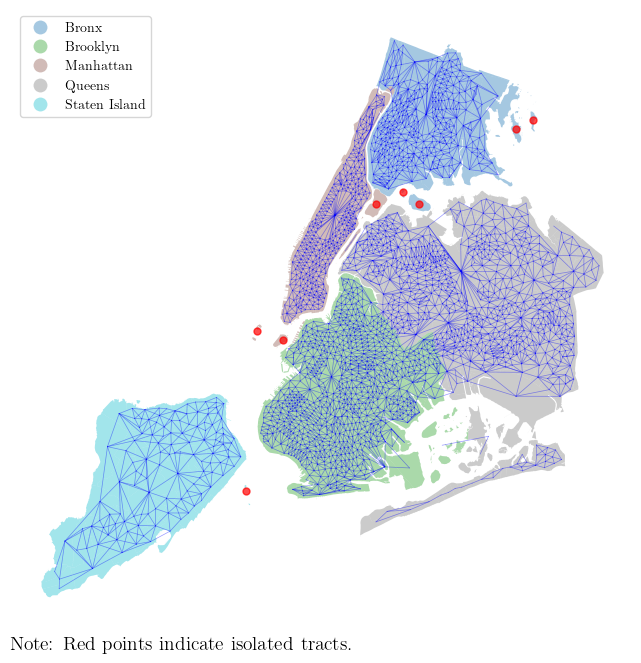

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

# enable latex plotting 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def create_academic_map(gdf, adj_matrix, method_name, isolated_nodes=None):
    # Project to NY State Plane (feet)
    gdf_proj = gdf.to_crs('EPSG:3857')
    
    fig, ax = plt.subplots(figsize=(10, 8))
    


    # Add note about scale
    plt.figtext(0.2, 0.08, 
                f'Note: Red points indicate isolated tracts.',
                fontsize=14)
    
    # Plot the data
    gdf_proj.plot(ax=ax, column='BoroName', categorical=True, 
                 alpha=0.4, legend=True)
    
    # Add adjacency lines
    for i in range(adj_matrix.shape[0]):
        for j in range(i+1, adj_matrix.shape[1]):
            if adj_matrix[i,j] == 1:
                cent1 = gdf_proj.iloc[i].geometry.centroid
                cent2 = gdf_proj.iloc[j].geometry.centroid
                ax.plot([cent1.x, cent2.x], [cent1.y, cent2.y], 
                       color='blue', alpha=0.4, linewidth=0.5)
    
    # Handle isolated nodes if provided
    if isolated_nodes:
        for idx in isolated_nodes:
            centroid = gdf_proj.iloc[idx].geometry.centroid
            ax.plot(centroid.x, centroid.y, 'ro', markersize=5, alpha=0.7)

    
    # Remove axes for cleaner map presentation
    ax.set_axis_off()
    
    return fig, ax

# Create map for custom geometric method
gdf = gpd.read_file("/share/ju/matt/street-flooding/aggregation/geo/data/ct-nyc-2020.geojson")
gdf = gdf.to_crs(epsg=2263)
adj_matrix = weights_results['custom_geometric'].weights_matrix
isolated_nodes = weights_results['custom_geometric'].isolated_tracts
fig, ax = create_academic_map(gdf, adj_matrix, 'Custom Geometric Method', isolated_nodes)

plt.savefig("/share/ju/matt/street-flooding/KDD-2025-Flooding-Paper/figures/adjacency_map.png", dpi=150, bbox_inches='tight', pad_inches=0.1)

In [ ]:
# Create maps for each method
output_dir = "./"
os.makedirs(output_dir, exist_ok=True)

for method, analysis in weights_results.items():
    print(f"Creating map for {method}...")
    m = create_method_map(
        generator.ct_nyc,
        analysis.weights_matrix,
        method,
        analysis.isolated_tracts
    )
    output_file = os.path.join(output_dir, f"adjacency_map_{method}.html")
    m.save(output_file)
    print(f"Saved to {output_file}")

print("\nAll maps have been created and saved.")

Creating map for queen...


/tmp/ipykernel_425732/698216896.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[gdf.geometry.centroid.y.mean(),
/tmp/ipykernel_425732/698216896.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.geometry.centroid.x.mean()],


Saved to ./adjacency_map_queen.html
Creating map for rook...


/tmp/ipykernel_425732/698216896.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[gdf.geometry.centroid.y.mean(),
/tmp/ipykernel_425732/698216896.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.geometry.centroid.x.mean()],


Saved to ./adjacency_map_rook.html
Creating map for custom_geometric...


/tmp/ipykernel_425732/698216896.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[gdf.geometry.centroid.y.mean(),
/tmp/ipykernel_425732/698216896.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.geometry.centroid.x.mean()],


Saved to ./adjacency_map_custom_geometric.html
Creating map for knn...


/tmp/ipykernel_425732/698216896.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[gdf.geometry.centroid.y.mean(),
/tmp/ipykernel_425732/698216896.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.geometry.centroid.x.mean()],


Saved to ./adjacency_map_knn.html
Creating map for distance...


/tmp/ipykernel_425732/698216896.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[gdf.geometry.centroid.y.mean(),
/tmp/ipykernel_425732/698216896.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.geometry.centroid.x.mean()],


Saved to ./adjacency_map_distance.html

All maps have been created and saved.


In [6]:
# Analyze specific problem tract
problem_tract = 5024800
neighbor_comparison = {}

for method, analysis in weights_results.items():
    tract_idx = generator.ct_nyc[generator.ct_nyc['BoroCT2020'] == problem_tract].index[0]
    W = analysis.weights_matrix
    neighbor_indices = np.where(W[tract_idx] == 1)[0]
    neighbor_tracts = generator.ct_nyc.iloc[neighbor_indices]['BoroCT2020'].tolist()
    neighbor_comparison[method] = neighbor_tracts

# Create comparison dataframe
neighbor_df = pd.DataFrame({
    'Method': list(neighbor_comparison.keys()),
    'Number of Neighbors': [len(n) for n in neighbor_comparison.values()],
    'Neighbor Tracts': [', '.join(map(str, sorted(n))) for n in neighbor_comparison.values()]
})

display(HTML("<h3>Neighbors Found for Tract {}</h3>".format(problem_tract)))
display(neighbor_df)

,Method,Number of Neighbors,Neighbor Tracts
0,queen,0,
1,rook,0,
2,custom_geometric,2,"5022602, 5024401"
3,knn,6,"5019800, 5020803, 5022601, 5022602, 5024401, 5..."
4,distance,0,


In [ ]:
# Analyze specific problem tract
problem_tract = 5024800
neighbor_comparison = {}

for method, analysis in weights_results.items():
    tract_idx = generator.ct_nyc[generator.ct_nyc['BoroCT2020'] == problem_tract].index[0]
    W = analysis.weights_matrix
    neighbor_indices = np.where(W[tract_idx] == 1)[0]
    neighbor_tracts = generator.ct_nyc.iloc[neighbor_indices]['BoroCT2020'].tolist()
    neighbor_comparison[method] = neighbor_tracts

# Create comparison dataframe
neighbor_df = pd.DataFrame({
    'Method': list(neighbor_comparison.keys()),
    'Number of Neighbors': [len(n) for n in neighbor_comparison.values()],
    'Neighbor Tracts': [', '.join(map(str, sorted(n))) for n in neighbor_comparison.values()]
})

display(HTML("<h3>Neighbors Found for Tract {}</h3>".format(problem_tract)))
display(neighbor_df)

,Method,Number of Neighbors,Neighbor Tracts
0,queen,0,
1,rook,0,
2,custom_geometric,2,"5022602, 5024401"
3,knn,6,"5019800, 5020803, 5022601, 5022602, 5024401, 5..."
4,distance,0,


In [ ]:
def find_disagreement_tracts(weights_results, min_disagreement=3):
    """Find tracts where methods disagree significantly on neighbors."""
    all_neighbors = {}
    method_names = list(weights_results.keys())
    
    # Get neighbors for each tract by each method
    for method, analysis in weights_results.items():
        W = analysis.weights_matrix
        for i in range(W.shape[0]):
            if i not in all_neighbors:
                all_neighbors[i] = {}
            all_neighbors[i][method] = set(np.where(W[i] == 1)[0])
    
    # Find tracts with significant disagreement
    disagreements = []
    for tract_idx, method_neighbors in all_neighbors.items():
        # Compare each pair of methods
        method_pairs = []
        for method1 in method_names:
            for method2 in method_names:
                if method1 < method2:
                    diff = len(method_neighbors[method1] ^ method_neighbors[method2])
                    if diff >= min_disagreement:
                        method_pairs.append((method1, method2, diff))
        
        if method_pairs:
            tract_info = generator.ct_nyc.iloc[tract_idx]
            disagreements.append({
                'tract_id': tract_info['BoroCT2020'],
                'borough': tract_info['BoroName'],
                'disagreements': method_pairs
            })
    
    return disagreements

# Find and display disagreements
disagreements = find_disagreement_tracts(weights_results)
print(f"Found {len(disagreements)} tracts with significant disagreement between methods\n")

for d in disagreements[:10]:  # Show first 10
    print(f"Tract {d['tract_id']} ({d['borough']})")
    for m1, m2, diff in d['disagreements']:
        print(f"  {m1} vs {m2}: {diff} different neighbors")
    print()

Found 1880 tracts with significant disagreement between methods

Tract 1000100 (Manhattan)
  custom_geometric vs knn: 6 different neighbors
  knn vs queen: 6 different neighbors
  knn vs rook: 6 different neighbors
  distance vs knn: 6 different neighbors

Tract 1000201 (Manhattan)
  custom_geometric vs knn: 3 different neighbors
  knn vs queen: 3 different neighbors
  knn vs rook: 3 different neighbors

Tract 1001401 (Manhattan)
  custom_geometric vs knn: 3 different neighbors
  knn vs queen: 3 different neighbors
  knn vs rook: 3 different neighbors
  distance vs knn: 3 different neighbors

Tract 1001402 (Manhattan)
  custom_geometric vs distance: 4 different neighbors
  distance vs queen: 4 different neighbors
  distance vs rook: 4 different neighbors
  distance vs knn: 3 different neighbors

Tract 1001800 (Manhattan)
  custom_geometric vs knn: 3 different neighbors
  knn vs queen: 3 different neighbors
  knn vs rook: 3 different neighbors
  distance vs knn: 3 different neighbors

T

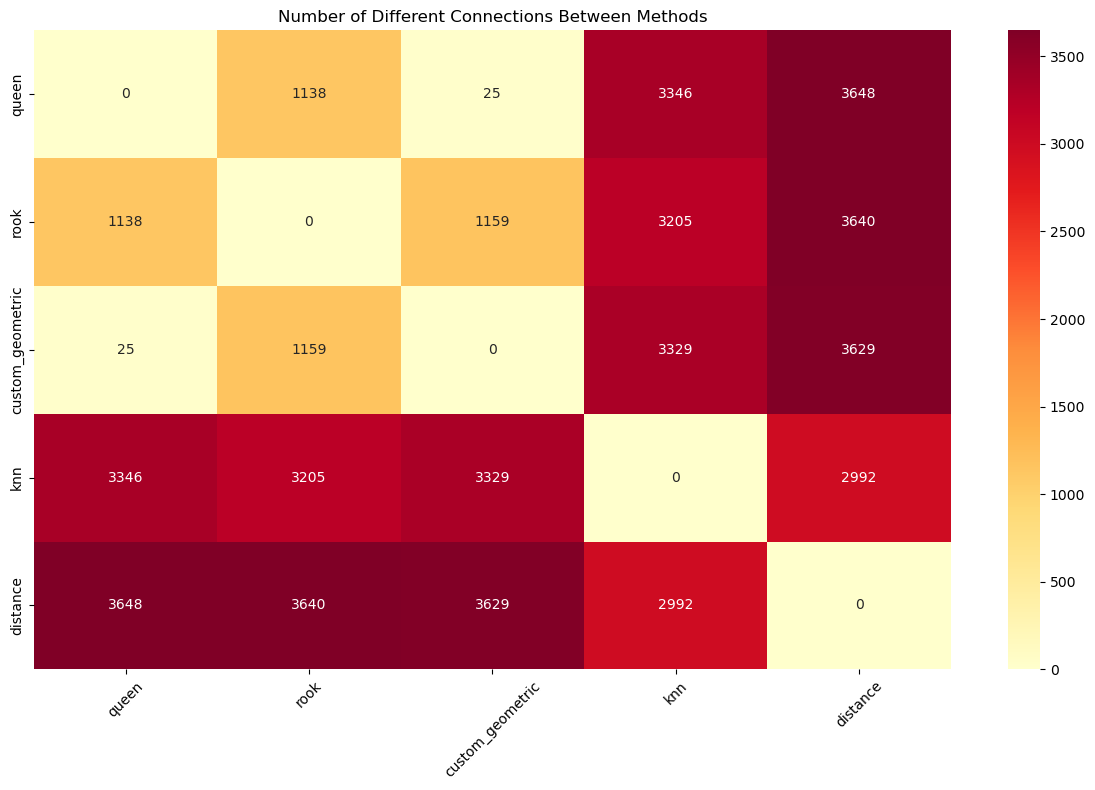

In [ ]:
# Create matrix of differences between methods
method_names = list(weights_results.keys())
n_methods = len(method_names)
diff_matrix = np.zeros((n_methods, n_methods))

for i, method1 in enumerate(method_names):
    for j, method2 in enumerate(method_names):
        if i < j:
            W1 = weights_results[method1].weights_matrix
            W2 = weights_results[method2].weights_matrix
            diff = np.abs(W1 - W2).sum() / 2  # divide by 2 as matrices are symmetric
            diff_matrix[i,j] = diff
            diff_matrix[j,i] = diff

plt.figure(figsize=(12, 8))
sns.heatmap(diff_matrix, 
            xticklabels=method_names,
            yticklabels=method_names,
            annot=True,
            fmt='.0f',
            cmap='YlOrRd')
plt.title('Number of Different Connections Between Methods')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(output_dir, 'method_differences.png'))

/tmp/ipykernel_425732/3837275767.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
/tmp/ipykernel_425732/3837275767.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
/tmp/ipykernel_425732/3837275767.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)



Borough-Level Statistics:


Avg Connections     Isolated Tracts  \
                                          mean std             sum   
Borough       Method                                                 
Bronx         custom_geometric            6.12 NaN               4   
              distance                    5.29 NaN              14   
              knn                         5.93 NaN               0   
              queen                       6.12 NaN               3   
              rook                        5.26 NaN               3   
Brooklyn      custom_geometric            6.24 NaN               1   
              distance                    6.21 NaN              14   
              knn                         5.96 NaN               0   
              queen                       6.24 NaN               1   
              rook                        5.28 NaN               1   
Manhattan     custom_geometric            6.07 NaN               4   
              distance                    6.68 NaN               4   
              knn                         5.91 NaN               0   
              queen                       6.06 NaN               3   
              rook                        4.59 NaN               3   
Queens        custom_geometric            6.08 NaN               0   
              distance                    4.22 NaN              73   
              knn                         5.92 NaN               0   
              queen                       6.09 NaN               0   
              rook                        5.25 NaN               0   
Staten Island custom_geometric            5.79 NaN               1   
              distance                    0.56 NaN              81   
              knn                         6.00 NaN               0   
              queen                       5.76 NaN               2   
              rook                        4.97 NaN               2   

                               Connection Density  
                                             mean  
Borough       Method                               
Bronx         custom_geometric               3.06  
              distance                       2.64  
              knn                            2.97  
              queen                          3.06  
              rook                           2.63  
Brooklyn      custom_geometric               3.12  
              distance                       3.11  
              knn                            2.98  
              queen                          3.12  
              rook                           2.64  
Manhattan     custom_geometric               3.04  
              distance                       3.34  
              knn                            2.96  
              queen                          3.03  
              rook                           2.30  
Queens        custom_geometric               3.04  
              distance                       2.11  
              knn                            2.96  
              queen                          3.04  
              rook                           2.63  
Staten Island custom_geometric               2.90  
              distance                       0.28  
              knn                            3.00  
              queen                          2.88  
              rook                           2.48


Correlations between geographic features and connectivity:

queen:
Connections    1.000
Area           0.156
Perimeter      0.102
Compactness   -0.062
Name: Connections, dtype: float64

rook:
Connections    1.000
Area           0.221
Perimeter      0.185
Compactness   -0.153
Name: Connections, dtype: float64

custom_geometric:
Connections    1.000
Area           0.148
Perimeter      0.092
Compactness   -0.052
Name: Connections, dtype: float64

knn:
Connections   NaN
Area          NaN
Perimeter     NaN
Compactness   NaN
Name: Connections, dtype: float64

distance:
Connections    1.000
Area          -0.419
Perimeter     -0.513
Compactness    0.361
Name: Connections, dtype: float64


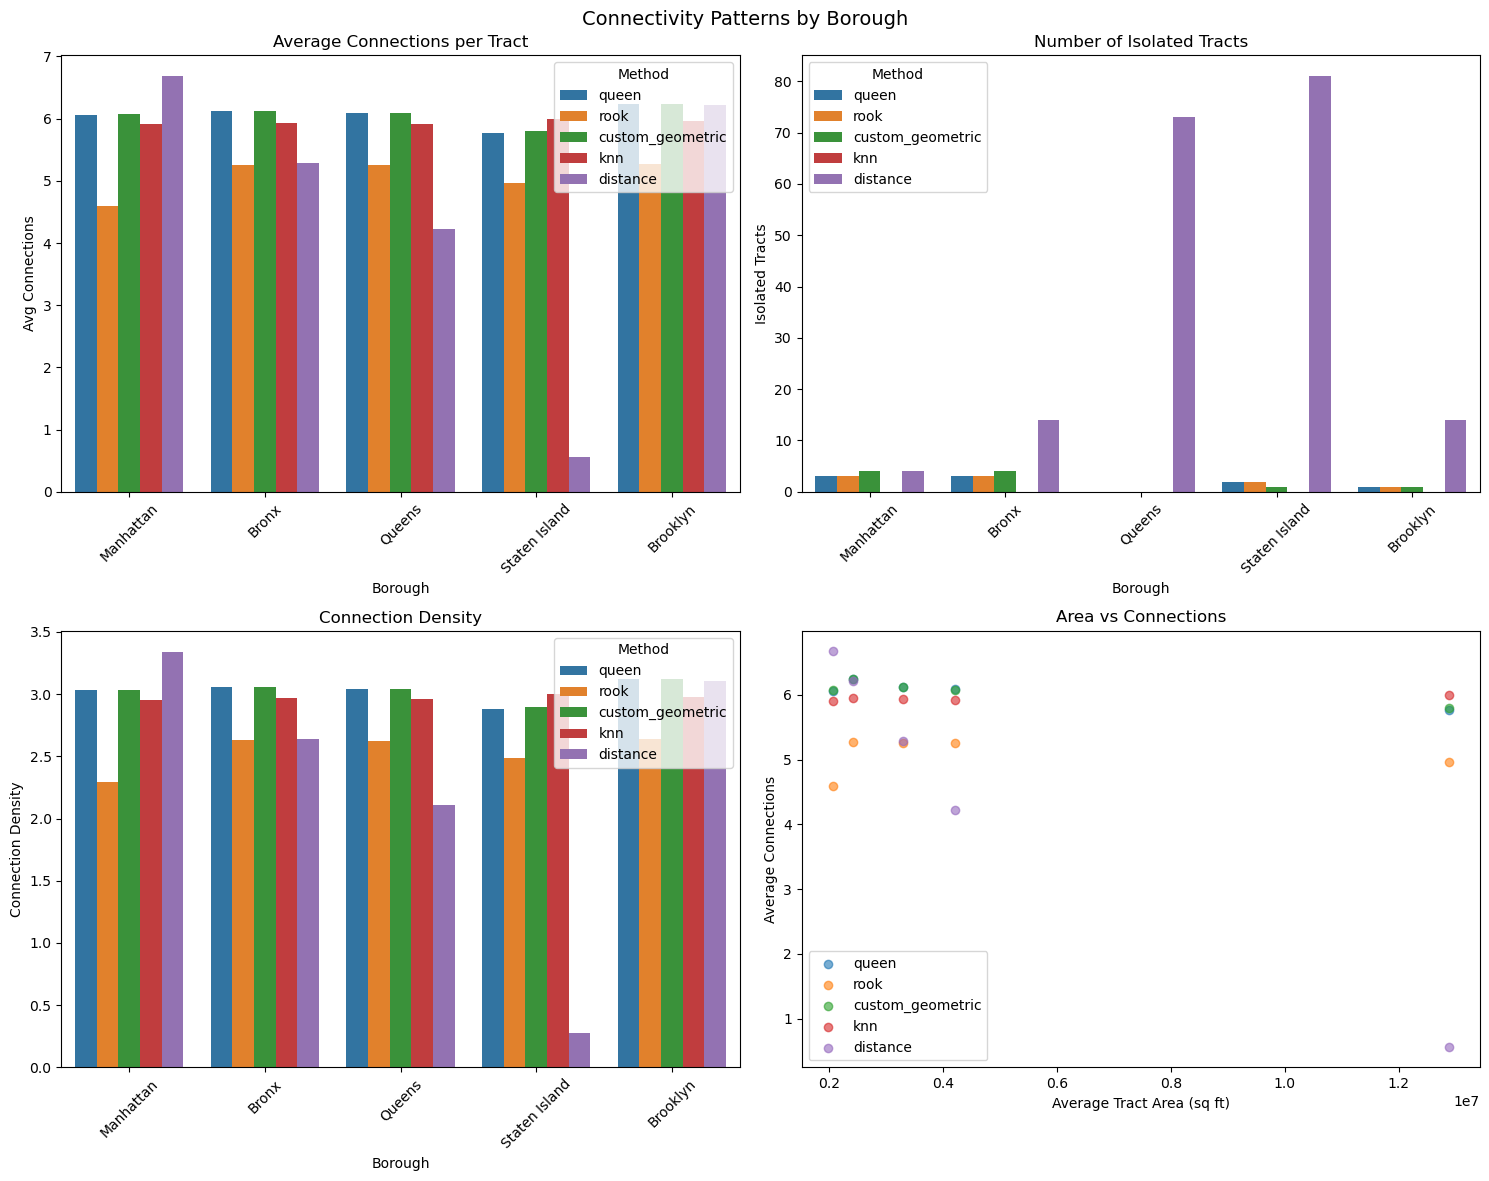

In [ ]:
# Analyze connectivity patterns by borough
borough_stats = []

for boro in generator.ct_nyc['BoroName'].unique():
    # Get indices for this borough
    boro_mask = generator.ct_nyc['BoroName'] == boro
    boro_indices = generator.ct_nyc[boro_mask].index
    
    for method, analysis in weights_results.items():
        # Get submatrix for this borough
        W = analysis.weights_matrix[boro_indices][:, boro_indices]
        n_connections = W.sum() / 2
        avg_connections = W.sum() / len(boro_indices)
        isolated = np.sum(W.sum(axis=1) == 0)
        
        # Get geometric properties
        boro_geoms = generator.ct_state_plane[boro_mask]
        total_area = boro_geoms.area.sum()
        avg_area = boro_geoms.area.mean()
        
        borough_stats.append({
            'Borough': boro,
            'Method': method,
            'Total Connections': n_connections,
            'Avg Connections': avg_connections,
            'Isolated Tracts': isolated,
            'Total Area (sq ft)': total_area,
            'Avg Tract Area (sq ft)': avg_area,
            'Connection Density': n_connections / len(boro_indices)
        })

borough_df = pd.DataFrame(borough_stats)

# Create visualization of borough patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Connectivity Patterns by Borough', fontsize=14)

# Plot 1: Average Connections
sns.barplot(data=borough_df, x='Borough', y='Avg Connections', 
            hue='Method', ax=axes[0,0])
axes[0,0].set_title('Average Connections per Tract')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)

# Plot 2: Isolated Tracts
sns.barplot(data=borough_df, x='Borough', y='Isolated Tracts',
            hue='Method', ax=axes[0,1])
axes[0,1].set_title('Number of Isolated Tracts')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)

# Plot 3: Connection Density
sns.barplot(data=borough_df, x='Borough', y='Connection Density',
            hue='Method', ax=axes[1,0])
axes[1,0].set_title('Connection Density')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)

# Plot 4: Area vs Connections scatter
for method in borough_df['Method'].unique():
    method_data = borough_df[borough_df['Method'] == method]
    axes[1,1].scatter(method_data['Avg Tract Area (sq ft)'], 
                     method_data['Avg Connections'],
                     label=method, alpha=0.6)
axes[1,1].set_title('Area vs Connections')
axes[1,1].set_xlabel('Average Tract Area (sq ft)')
axes[1,1].set_ylabel('Average Connections')
axes[1,1].legend()

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'borough_analysis.png'))

# Statistical comparisons
print("\nBorough-Level Statistics:")
display(borough_df.groupby(['Borough', 'Method']).agg({
    'Avg Connections': ['mean', 'std'],
    'Isolated Tracts': 'sum',
    'Connection Density': 'mean'
}).round(2))

# Analyze geographic patterns in differences
def compute_geographic_differences(weights_results, gdf):
    """Compute how methods differ based on geographic features"""
    geo_stats = []
    
    for method, analysis in weights_results.items():
        W = analysis.weights_matrix
        for i in range(len(gdf)):
            tract = gdf.iloc[i]
            n_connections = W[i].sum()
            
            geo_stats.append({
                'Method': method,
                'Tract': tract['BoroCT2020'],
                'Borough': tract['BoroName'],
                'Connections': n_connections,
                'Area': tract.geometry.area,
                'Perimeter': tract.geometry.length,
                'Compactness': 4 * np.pi * tract.geometry.area / (tract.geometry.length ** 2)
            })
    
    return pd.DataFrame(geo_stats)

geo_df = compute_geographic_differences(weights_results, generator.ct_state_plane)

# Correlation analysis
print("\nCorrelations between geographic features and connectivity:")
for method in geo_df['Method'].unique():
    method_data = geo_df[geo_df['Method'] == method]
    correlations = method_data[['Connections', 'Area', 'Perimeter', 'Compactness']].corr()
    print(f"\n{method}:")
    print(correlations['Connections'].round(3))